# Exercises - Decision Tree
## Using the titanic data, in your `classification-exercises` repository, create a notebook, `model.ipynb` where you will do the following:

In [1]:
#imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import acquire
import prepare
import warnings
warnings.filterwarnings("ignore")

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression


In [2]:
df_titanic = acquire.get_titanic_data()

In [3]:
df_titanic = prepare.prep_titanicb(df_titanic)

In [4]:
df_titanic.head()

,passenger_id,survived,pclass,age,sibsp,parch,fare,embarked,alone,is_female,embark_Cherbourg,embark_Queenstown,embark_Southampton
0,0,0,3,22.0,1,0,7.2500,S,0,0,0,0,1
1,1,1,1,38.0,1,0,71.2833,C,0,1,1,0,0
2,2,1,3,26.0,0,0,7.9250,S,1,1,0,0,1
3,3,1,1,35.0,1,0,53.1000,S,0,1,0,0,1
4,4,0,3,35.0,0,0,8.0500,S,1,0,0,0,1


In [5]:
df_titanic.drop(columns=['passenger_id', 'embarked'], inplace=True)
df_titanic.head()

,survived,pclass,age,sibsp,parch,fare,alone,is_female,embark_Cherbourg,embark_Queenstown,embark_Southampton
0,0,3,22.0,1,0,7.2500,0,0,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,1,0,0
2,1,3,26.0,0,0,7.9250,1,1,0,0,1
3,1,1,35.0,1,0,53.1000,0,1,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,0,0,1


In [6]:
# Target = Survived
train_titanic, validate_titanic, test_titanic = prepare.split_data(df_titanic, 'survived')

Prepared df: (712, 11)

Train: (426, 11)
Validate: (143, 11)
Test: (143, 11)


In [7]:
train_titanic.survived.value_counts(normalize=True)

0    0.596244
1    0.403756
Name: survived, dtype: float64

### Step 1: What is your baseline prediction? 
> `Remember`: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.  

> Baseline prediction is that the passenger did not survive  
* `survived == 0`


### Step 1a: What is your baseline accuracy? 

In [8]:
X_train = train_titanic.drop(columns=['survived'])
y_train = train_titanic.survived

X_validate = validate_titanic.drop(columns=['survived'])
y_validate = validate_titanic.survived

X_test = test_titanic.drop(columns=['survived'])
y_test = test_titanic.survived

In [9]:
baseline_acc = (y_train == 0).mean()

In [10]:
print(f'Baseline accuracy for non-survival prediction on the Titanic Dataset is: {baseline_acc: .2}')

Baseline accuracy for non-survival prediction on the Titanic Dataset is:  0.6


### Step 2: Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

> Follow in practice steps

In [11]:
# create object
clf_titanic = DecisionTreeClassifier(max_depth=3, random_state=123)

In [12]:
#fit the model --> model.fit(X,y)
clf_titanic = clf_titanic.fit(X_train, y_train)

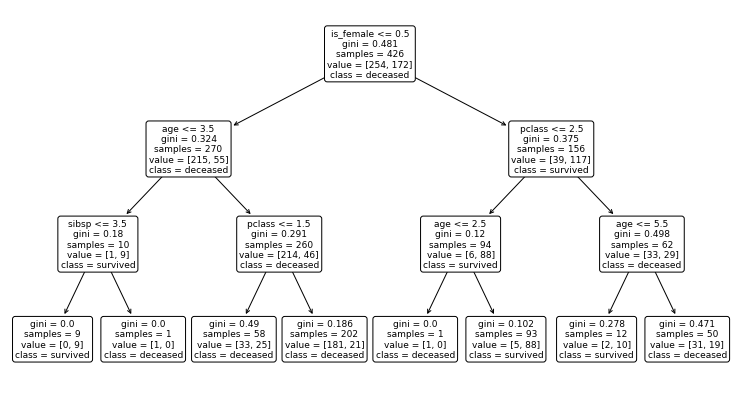

In [13]:
#viz the decision tree
# you need to convert the class names away from 0,1 --> deceased, survived
plt.figure(figsize=(13,7))
plot_tree(clf_titanic, feature_names=X_train.columns.to_list(), class_names=['deceased', 'survived'], rounded=True);

In [14]:
# Make Predictions
y_pred = clf_titanic.predict(X_train)


In [15]:
y_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,

In [16]:
# Estimate Probability 
y_pred_proba = clf_titanic.predict_proba(X_train)
y_pred_proba[0:5]


array([[0.8960396 , 0.1039604 ],
       [0.8960396 , 0.1039604 ],
       [0.8960396 , 0.1039604 ],
       [0.05376344, 0.94623656],
       [0.8960396 , 0.1039604 ]])

### Step 3: Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [17]:
#compute accuracy 
print(f'Accuracy of Decision Tree classifier on training set: {clf_titanic.score(X_train, y_train)}')

Accuracy of Decision Tree classifier on training set: 0.8309859154929577


In [18]:
#create confusion matrix --> positive == survived, negatives == deceased
confusion_titanic = confusion_matrix(y_train, y_pred)

#assign results of confusion matrix to variables
true_negative = confusion_titanic[0,0]
false_positive = confusion_titanic[0,1]
false_negative = confusion_titanic[1,0]
true_positive = confusion_titanic[1,1]

#print out for easier ounderstanding
print(f'True Negatives: {true_negative}')
print(f'False Positives: {false_positive}')
print(f'False Negative: {false_negative}')
print(f'True Positives: {true_positive}')

True Negatives: 247
False Positives: 7
False Negative: 65
True Positives: 107


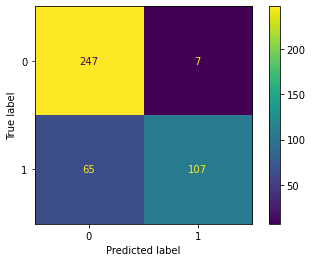

In [19]:
disp = ConfusionMatrixDisplay(confusion_titanic, display_labels=clf_titanic.classes_)
disp.plot()
plt.show()

In [20]:
#get the classification report
pd.DataFrame(classification_report(y_train, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.791667,0.938596,0.830986,0.865132,0.850990
recall,0.972441,0.622093,0.830986,0.797267,0.830986
f1-score,0.872792,0.748252,0.830986,0.810522,0.822508
support,254.000000,172.000000,0.830986,426.000000,426.000000


### Step 4: Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [21]:
#accuracy
accuracy = (true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative)
print(f'Accuracy: {accuracy}')

#true positive rate/ recall
recall = true_positive / (true_positive +false_negative)
print(f'True Positive Rate/Recall: {recall} ')

#false positive rate
false_positive_rate = false_positive / (true_negative + false_positive)
print(f'False Positive Rate: {false_positive_rate} ')

#true negative rate
true_negative_rate = true_negative / (true_negative + false_positive)
print(f'True Negative Rate: {true_negative_rate}')

#false negative rate
false_negative_rate = false_negative / (false_negative + true_positive)
print(f'False Negative Rate: {false_negative_rate}')

#precision
precision = true_positive / (true_positive + false_positive)
print(f'Precision: {precision}')

#f1-score
f1_score = 2 * (precision * recall) / (precision + recall)
print(f'F1-Score: {f1_score}')

#support
support_positive = true_positive + false_negative
support_negative = false_positive + true_negative
print(f'Support Positive: {support_positive} \nSupport Negative: {support_negative}')

Accuracy: 0.8309859154929577
True Positive Rate/Recall: 0.622093023255814 
False Positive Rate: 0.027559055118110236 
True Negative Rate: 0.9724409448818898
False Negative Rate: 0.37790697674418605
Precision: 0.9385964912280702
F1-Score: 0.7482517482517483
Support Positive: 172 
Support Negative: 254


In [22]:
#collect data from original model that was built piecemeal for exercise
statistics = ['Accuracy/Score',
    'True Positives' , 'False Postives', 'True Negatives', 'False Negatives', \
    'TPR/Recall', 'False Positive Rate', 'True Negative Rate', 'False Negative Rate', \
    'Precision', 'F1-Score', 'Support Positive', 'Support Negative']

calculated = [accuracy, true_positive, false_positive, true_negative, false_negative,\
                        recall, false_positive_rate, true_negative_rate, false_negative_rate, \
                        precision, f1_score, support_positive, support_negative]

comparison_chart = pd.DataFrame({'model1': calculated}, index=statistics)


### Run through steps 2-4 using a different max_depth value.



In [23]:
comparison_chart

,model1
Accuracy/Score,0.830986
True Positives,107.000000
False Postives,7.000000
True Negatives,247.000000
False Negatives,65.000000
TPR/Recall,0.622093
False Positive Rate,0.027559
True Negative Rate,0.972441
False Negative Rate,0.377907
Precision,0.938596


In [24]:
clf_titanic_b = DecisionTreeClassifier(max_depth=4, random_state=123)

In [25]:
def fit_eval_compute (model, X_df, y_df):
    """
    Takes in a model, the big X, and little y and performs model fit,\ evalution, and compute operations for the titanic data set. 
    
    Returns: none
    """
    


    #fit the model --> model.fit(X,y)
    model = model.fit(X_df, y_df)

    #viz the decision tree
    # you need to convert the class names away from 0,1 --> deceased, survived
    # plt.figure(figsize=(13,7))
    # plot_tree(model, feature_names=X_df.columns.to_list(), class_names=['deceased', 'survived'], rounded=True)
    # plt.title(model);

    # Make Predictions
    y_pred = model.predict(X_df)

    # Estimate Probability 
    y_pred_proba = model.predict_proba(X_df)

    #compute accuracy 
    #print(f'Accuracy of Decision Tree classifier on training set: {model.score(X_df, y_df)}')

    #create confusion matrix
    confusion = confusion_matrix(y_df, y_pred)

    #assign results of confusion matrix to variables
    true_negative = confusion[0,0]
    false_positive = confusion[0,1]
    false_negative = confusion[1,0]
    true_positive = confusion[1,1]

    #print out for easier ounderstanding
    #print(f'True Positives: {true_positive}')
    #print(f'False Positives: {false_positive}')
    #print(f'False Negative: {false_negative}')

    #get the classification report
    #pd.DataFrame(classification_report(y_df, y_pred, output_dict=True))

    #accuracy
    accuracy = (true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative)
    #print(f'Accuracy: {accuracy}')

    #true positive rate / recall
    recall = true_positive / (true_positive +false_negative)
    #print(f'True Positive Rate/Recall: {recall} ')

    #false positive rate
    false_positive_rate = false_positive / (true_negative + false_positive)
    #print(f'False Positive Rate: {false_positive_rate} ')

    #true negative rate
    true_negative_rate = true_negative / (true_negative + false_positive)
    #print(f'True Negative Rate: {true_negative_rate}')

    #false negative rate
    false_negative_rate = false_negative / (false_negative + true_positive)
    #print(f'False Negative Rate: {false_negative_rate}')

    #precision
    precision = true_positive / (true_positive + false_positive)
    #print(f'Precision: {precision}')

    #f1-score
    f1_score = 2 * (precision * recall) / (precision + recall)
    #print(f'F1-Score: {f1_score}')

    #support
    support_positive = true_positive + false_negative
    support_negative = false_positive + true_negative
    #print(f'Support Positive: {support_positive} \nSupport Negative: {support_negative}')

    computes = pd.Series([accuracy, true_positive, false_positive, true_negative, false_negative,\
                        recall, false_positive_rate, true_negative_rate, false_negative_rate, \
                        precision, f1_score, support_positive, support_negative])
    return computes

In [26]:
#need to use values because of the custom index setting ... i think. couldnt get it to work otherwise
comparison_chart['model2'] = fit_eval_compute(clf_titanic_b, X_train, y_train).values

In [27]:
fit_eval_compute(clf_titanic, X_train, y_train)

0       0.830986
1     107.000000
2       7.000000
3     247.000000
4      65.000000
5       0.622093
6       0.027559
7       0.972441
8       0.377907
9       0.938596
10      0.748252
11    172.000000
12    254.000000
dtype: float64

In [28]:
comparison_chart

,model1,model2
Accuracy/Score,0.830986,0.845070
True Positives,107.000000,121.000000
False Postives,7.000000,15.000000
True Negatives,247.000000,239.000000
False Negatives,65.000000,51.000000
TPR/Recall,0.622093,0.703488
False Positive Rate,0.027559,0.059055
True Negative Rate,0.972441,0.940945
False Negative Rate,0.377907,0.296512
Precision,0.938596,0.889706


In [29]:
fit_eval_compute(clf_titanic_b, X_train, y_train).values

array([8.45070423e-01, 1.21000000e+02, 1.50000000e+01, 2.39000000e+02,
       5.10000000e+01, 7.03488372e-01, 5.90551181e-02, 9.40944882e-01,
       2.96511628e-01, 8.89705882e-01, 7.85714286e-01, 1.72000000e+02,
       2.54000000e+02])

### Which model performs better on your in-sample data? This means which has a higher score I think. 

In [30]:
comp_chart = pd.DataFrame({
    'Actual/Target': y_train,
    'Baseline Prediction': 0,
    'model_1': clf_titanic.predict(X_train),
    'model_2': clf_titanic_b.predict(X_train)
})
comp_chart

,Actual/Target,Baseline Prediction,model_1,model_2
104,0,0,0,0
379,0,0,0,0
682,0,0,0,0
432,1,0,1,1
890,0,0,0,0
...,...,...,...,...
472,1,0,1,1
310,1,0,1,1
341,1,0,1,1
72,0,0,0,0


In [31]:
print(f'Scores\n-----')
print(f'Model 1: {clf_titanic.score(X_train, y_train)}')
print(f'Model 2: {clf_titanic_b.score(X_train, y_train)}')

Scores
-----
Model 1: 0.8309859154929577
Model 2: 0.8450704225352113


### Which model performs best on your out-of-sample data, the validate set?



In [32]:
print(f'Validate Scores\n-----')
print(f'Model 1: {clf_titanic.score(X_validate, y_validate)}')
print(f'Model 2: {clf_titanic_b.score(X_validate, y_validate)}')

Validate Scores
-----
Model 1: 0.7832167832167832
Model 2: 0.7692307692307693


## Work through these same exercises using the Telco dataset.


### Step Zero: Acquire, Prepare, Explore (done previously)


In [77]:
telco_chart = comparison_chart.drop(columns=['model1', 'model2'])

,model1,model2
Accuracy/Score,0.830986,0.845070
True Positives,107.000000,121.000000
False Postives,7.000000,15.000000
True Negatives,247.000000,239.000000
False Negatives,65.000000,51.000000
TPR/Recall,0.622093,0.703488
False Positive Rate,0.027559,0.059055
True Negative Rate,0.972441,0.940945
False Negative Rate,0.377907,0.296512
Precision,0.938596,0.889706


In [59]:
#acquire telco data
telco = acquire.get_telco_data()

,internet_service_type_id,payment_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,payment_type,internet_service_type
0,1,2,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,Mailed check,DSL
1,1,2,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,Mailed check,DSL
2,2,1,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Electronic check,Fiber optic
3,2,1,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Electronic check,Fiber optic
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Mailed check,Fiber optic


In [60]:
telco = prepare.prep_telco(telco)

In [72]:
telco.total_charges.fillna(0.00, inplace=True)

In [64]:
telco = telco.select_dtypes(exclude='object')

In [65]:
telco = telco.rename(columns={'gender_encoded': 'gender', 'partner_encoded': 'partner', \
                    'dependents_encoded': 'dependents', 'phone_service_encoded': 'phone_service', \
                    'paperless_billing_encoded': 'paperless_billing'})

In [73]:
train, validate, split = prepare.split_data(telco, 'churn_encoded')

Prepared df: (7043, 31)

Train: (4225, 31)
Validate: (1409, 31)
Test: (1409, 31)


### Step 1: What is baseline prediction and accuracy?

In [74]:
# baseline prediction/accuracy --> ~73%
telco.churn_encoded.value_counts(normalize=True)

0    0.73463
1    0.26537
Name: churn_encoded, dtype: float64

### Steps 2-4: Fit, evaluate, compute

In [75]:
# 2a - create Big X, and little Y
X_train = telco.drop(columns=['churn_encoded'])
y_train = telco.churn_encoded

X_validate = telco.drop(columns=['churn_encoded'])
y_validate = telco.churn_encoded

X_test = telco.drop(columns=['churn_encoded'])
y_test = telco.churn_encoded

In [78]:
#create object 
telco_a = DecisionTreeClassifier(max_depth=3, random_state=123)

#fit model
telco_chart['Model A'] = fit_eval_compute(telco_a, X_train, y_train).values

### Step 5: Change max_deph value and go through previous steps

In [88]:
#create object 
telco_b = DecisionTreeClassifier(max_depth=6, random_state=123)

#fit model
telco_chart['Model B'] = fit_eval_compute(telco_b, X_train, y_train).values

In [89]:
telco_chart

,Model A,Model B
Accuracy/Score,0.790288,0.805907
True Positives,740.000000,1050.000000
False Postives,348.000000,548.000000
True Negatives,4826.000000,4626.000000
False Negatives,1129.000000,819.000000
TPR/Recall,0.395934,0.561798
False Positive Rate,0.067259,0.105914
True Negative Rate,0.932741,0.894086
False Negative Rate,0.604066,0.438202
Precision,0.680147,0.657071


## Experiment with this model on other datasets with a higher number of output classes.

# Exercises - Random Forest

## Continue working in your `model` file with titanic data to do the following:


In [33]:
#bringing down the baseline predictions 


### 1 - `Fit` the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

In [34]:
# first create classifier object --> will use [a, b, c ...] naming convention
rf_titanic_a = RandomForestClassifier(max_depth=10, min_samples_leaf=10, random_state=123)


In [35]:
# do fitting with X_train and y_train --> the training data
rf_titanic_a.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=10, random_state=123)

Text(0.5, 1.0, 'Feature Importance')

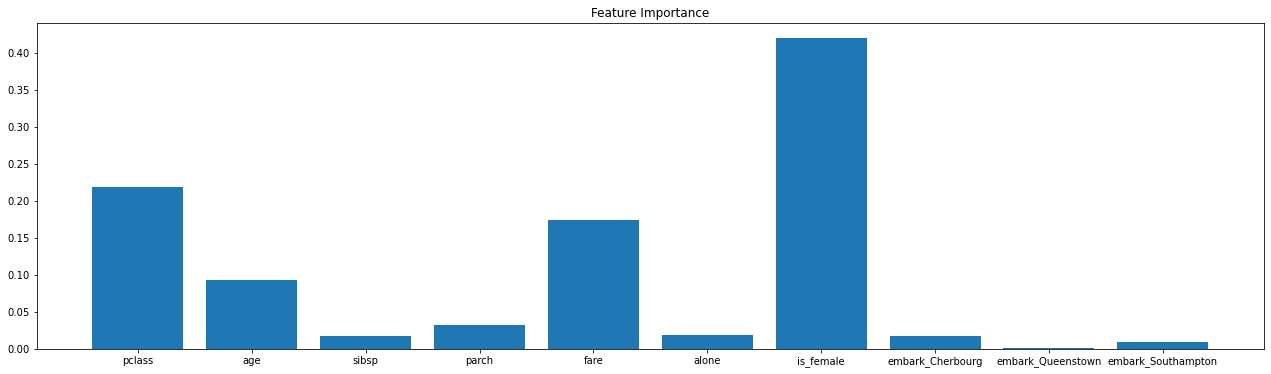

In [36]:
# highlight feature importance 
feat_importance = rf_titanic_a.feature_importances_
plt.figure(figsize=(22,6))
plt.bar(X_train.columns, feat_importance)
plt.title('Feature Importance')


In [37]:
rf_act_base_pred = pd.DataFrame({'Actual': y_train, 'Baseline': 0})
rf_act_base_pred 

,Actual,Baseline
104,0,0
379,0,0
682,0,0
432,1,0
890,0,0
...,...,...
472,1,0
310,1,0
341,1,0
72,0,0


In [38]:
# make predictions using model and attach them to dFrame that holds the actual values
y_predictions = rf_titanic_a.predict(X_train)
rf_act_base_pred['rf_a_pred'] = y_predictions

In [39]:
rf_act_base_pred

,Actual,Baseline,rf_a_pred
104,0,0,0
379,0,0,0
682,0,0,0
432,1,0,1
890,0,0,0
...,...,...,...
472,1,0,1
310,1,0,1
341,1,0,1
72,0,0,0


In [40]:
y_pred_proba = rf_titanic_a.predict_proba(X_train)
y_pred_proba

array([[0.86923364, 0.13076636],
       [0.92656643, 0.07343357],
       [0.89195409, 0.10804591],
       [0.23014866, 0.76985134],
       [0.88134038, 0.11865962],
       [0.17526682, 0.82473318],
       [0.86100355, 0.13899645],
       [0.46872997, 0.53127003],
       [0.93535176, 0.06464824],
       [0.16602076, 0.83397924],
       [0.4851011 , 0.5148989 ],
       [0.45660364, 0.54339636],
       [0.80600166, 0.19399834],
       [0.9265695 , 0.0734305 ],
       [0.91718839, 0.08281161],
       [0.62385836, 0.37614164],
       [0.79420797, 0.20579203],
       [0.82396033, 0.17603967],
       [0.10519953, 0.89480047],
       [0.47866183, 0.52133817],
       [0.51714543, 0.48285457],
       [0.72895458, 0.27104542],
       [0.92355339, 0.07644661],
       [0.92694237, 0.07305763],
       [0.57779398, 0.42220602],
       [0.52596415, 0.47403585],
       [0.60770972, 0.39229028],
       [0.93719138, 0.06280862],
       [0.5251342 , 0.4748658 ],
       [0.84141855, 0.15858145],
       [0.

### 2 - Evaluate your results using the model score, confusion matrix, and classification report.



In [41]:
#compute accuracy/score
rf_titanic_a_score = rf_titanic_a.score(X_train, y_train)
rf_titanic_a_score

0.8356807511737089

In [42]:
rf_a_report = classification_report(y_train, y_predictions)
print(rf_a_report)

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       254
           1       0.86      0.71      0.78       172

    accuracy                           0.84       426
   macro avg       0.84      0.82      0.82       426
weighted avg       0.84      0.84      0.83       426



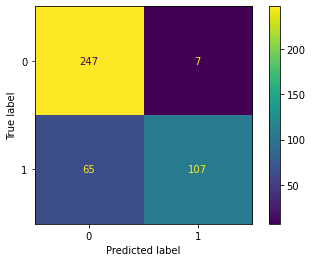

In [43]:
#create confusion matrix
rf_titanic_a_cm = confusion_matrix(y_train, y_pred)
ConfusionMatrixDisplay(rf_titanic_a_cm, display_labels=rf_titanic_a.classes_).plot();

### 3 - Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.



In [44]:
#run fit_eval_compute functions to get the computes
rf_titanic_a_computes = fit_eval_compute(rf_titanic_a, X_train, y_train)

In [45]:
#create dFrame to hold computes starting with first model
rf_computes = pd.DataFrame({'Model A': rf_titanic_a_computes.values}, index=statistics)

In [46]:
rf_computes

,Model A
Accuracy/Score,0.835681
True Positives,122.000000
False Postives,20.000000
True Negatives,234.000000
False Negatives,50.000000
TPR/Recall,0.709302
False Positive Rate,0.078740
True Negative Rate,0.921260
False Negative Rate,0.290698
Precision,0.859155


### 4 - Run through steps increasing your min_samples_leaf and decreasing your max_depth.



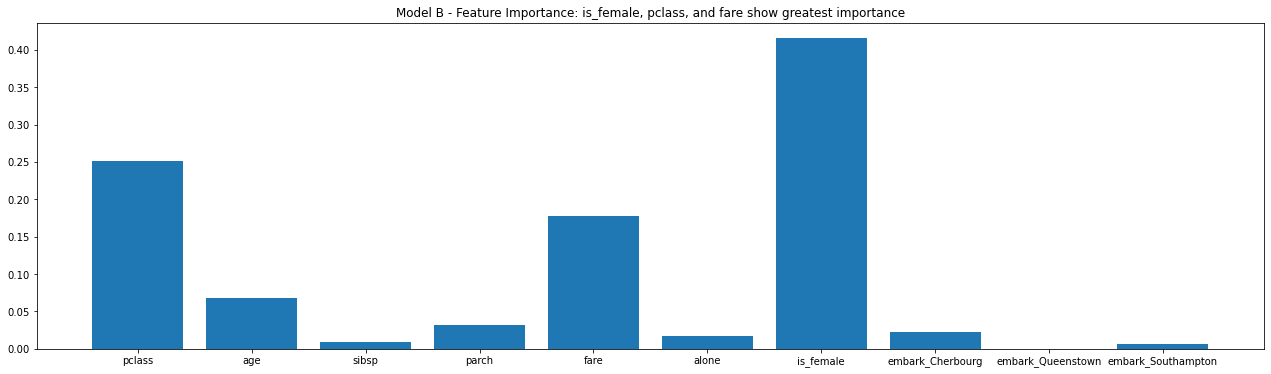

In [47]:
# first create classifier object --> will use [a, b, c ...] naming convention
rf_titanic_b = RandomForestClassifier(max_depth=5, min_samples_leaf=15, random_state=123)

# do fitting with X_train and y_train --> the training data
rf_titanic_b.fit(X_train, y_train)

# highlight feature importance 
rf_titanic_b_feat = rf_titanic_b.feature_importances_
plt.figure(figsize=(22,6))
plt.bar(X_train.columns, rf_titanic_b_feat)
plt.title('Model B - Feature Importance: is_female, pclass, and fare show greatest importance')

# make predictions using model and attach them to dFrame that holds the actual values
y_predictions_b = rf_titanic_b.predict(X_train)
rf_act_base_pred['rf_b_pred'] = y_predictions_b

#estimate probability
y_pred_proba = rf_titanic_b.predict_proba(X_train)



In [48]:
rf_act_base_pred

,Actual,Baseline,rf_a_pred,rf_b_pred
104,0,0,0,0
379,0,0,0,0
682,0,0,0,0
432,1,0,1,1
890,0,0,0,0
...,...,...,...,...
472,1,0,1,1
310,1,0,1,1
341,1,0,1,1
72,0,0,0,0


In [49]:
y_pred_proba[0:5]

array([[0.83372169, 0.16627831],
       [0.89242337, 0.10757663],
       [0.87115969, 0.12884031],
       [0.27856758, 0.72143242],
       [0.880501  , 0.119499  ]])

### 5a - What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?



Score: 0.8075117370892019

Classification Report
-----
                    0           1  accuracy   macro avg  weighted avg
precision    0.802817    0.816901  0.807512    0.809859      0.808504
recall       0.897638    0.674419  0.807512    0.786028      0.807512
f1-score     0.847584    0.738854  0.807512    0.793219      0.803683
support    254.000000  172.000000  0.807512  426.000000    426.000000


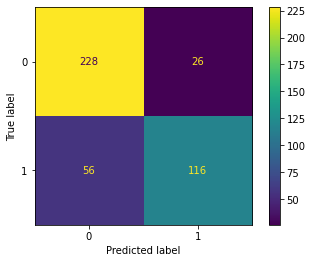

In [50]:
#compute accuracy/score
rf_titanic_b_score = rf_titanic_b.score(X_train, y_train)
print(f'Score: {rf_titanic_b_score}\n')

rf_b_report = classification_report(y_train, y_predictions_b, output_dict=True)
print(f'Classification Report\n-----\n{pd.DataFrame(rf_b_report)}')

#create confusion matrix
rf_titanic_b_cm = confusion_matrix(y_train, y_predictions_b)
ConfusionMatrixDisplay(rf_titanic_b_cm, display_labels=rf_titanic_b.classes_).plot();

In [51]:
rf_computes['Model B'] = fit_eval_compute(rf_titanic_b, X_train, y_train).values
rf_computes

,Model A,Model B
Accuracy/Score,0.835681,0.807512
True Positives,122.000000,116.000000
False Postives,20.000000,26.000000
True Negatives,234.000000,228.000000
False Negatives,50.000000,56.000000
TPR/Recall,0.709302,0.674419
False Positive Rate,0.078740,0.102362
True Negative Rate,0.921260,0.897638
False Negative Rate,0.290698,0.325581
Precision,0.859155,0.816901


### 6 - After making a few models, which one has the best performance (or closest metrics) on both train and validate?

# Exercises - KNN

Continue working in your model file with the titanic dataset.

### Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)



In [52]:
# create kNN object --> fill with n_neighbors and weights
knn_titanic_a = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [53]:
#fit model
knn_titanic_a.fit(X_train, y_train)


KNeighborsClassifier()

In [54]:
#make predictions
knn_titanic_a_pred = knn_titanic_a.predict(X_train)
knn_titanic_a_pred 

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,

In [55]:
#estimate probability
knn_titanic_a_pred_proba = knn_titanic_a.predict_proba(X_train)
knn_titanic_a_pred_proba

array([[1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.6, 0.4],
       [1. , 0. ],
       [0. , 1. ],
       [0.8, 0.2],
       [0.6, 0.4],
       [1. , 0. ],
       [0.4, 0.6],
       [0.6, 0.4],
       [0. , 1. ],
       [0.4, 0.6],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.8, 0.2],
       [0.2, 0.8],
       [0.8, 0.2],
       [0.2, 0.8],
       [0.6, 0.4],
       [1. , 0. ],
       [1. , 0. ],
       [0.6, 0.4],
       [1. , 0. ],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.2, 0.8],
       [0.4, 0.6],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.4, 0.6],
       [1. , 0. ],
       [0.4, 0.6],
       [0.2, 0.8],
       [1. , 0. ],
       [0.2, 0.8],
       [1. ,

### Evaluate your results using the model score, confusion matrix, and classification report.



In [56]:
#compute accuracy/score 
print(f'Score: {knn_titanic_a.score(X_train, y_train)}')

Score: 0.7887323943661971


In [57]:
#create and display confusion matrix
knn_titanic_a_cm = confusion_matrix(y_train, knn__titanic_a_pred)
ConfusionMatrixDisplay(knn_titanic_a_cm, display_labels=knn_titanic_a.classes_).plot();

NameError: name 'knn__titanic_a_pred' is not defined

In [ ]:
#create classification report
print(f'Classification Report\n-----\n{pd.DataFrame(classification_report(y_train, knn_titanic_a_pred, output_dict=True))}')

Classification Report
-----
                    0           1  accuracy   macro avg  weighted avg
precision    0.797101    0.773333  0.788732    0.785217      0.787505
recall       0.866142    0.674419  0.788732    0.770280      0.788732
f1-score     0.830189    0.720497  0.788732    0.775343      0.785900
support    254.000000  172.000000  0.788732  426.000000    426.000000


### Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.


In [ ]:
knn_computes = pd.DataFrame({'Model A': fit_eval_compute(knn_titanic_a, X_train, y_train).values}, index=statistics)
knn_computes

,Model A
Accuracy/Score,0.788732
True Positives,116.000000
False Postives,34.000000
True Negatives,220.000000
False Negatives,56.000000
TPR/Recall,0.674419
False Positive Rate,0.133858
True Negative Rate,0.866142
False Negative Rate,0.325581
Precision,0.773333


### Run through steps 2-4 setting k to 10


Score: 0.7582159624413145
Classification Report
-----
                    0           1  accuracy   macro avg  weighted avg
precision    0.750831    0.776000  0.758216    0.763415      0.760993
recall       0.889764    0.563953  0.758216    0.726859      0.758216
f1-score     0.814414    0.653199  0.758216    0.733807      0.749323
support    254.000000  172.000000  0.758216  426.000000    426.000000


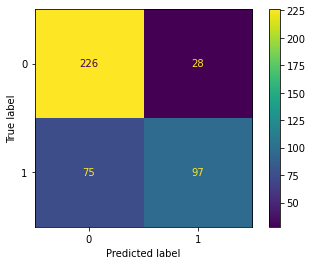

In [ ]:
# create kNN object --> fill with n_neighbors and weights
knn_titanic_b = KNeighborsClassifier(n_neighbors=10, weights='uniform')
#fit model
knn_titanic_b.fit(X_train, y_train)

#make predictions
knn_titanic_b_pred = knn_titanic_b.predict(X_train)

#estimate probability
knn_titanic_b_pred_proba = knn_titanic_b.predict_proba(X_train)

#compute accuracy/score 
print(f'Score: {knn_titanic_b.score(X_train, y_train)}')

#create and display confusion matrix
knn_titanic_b_cm = confusion_matrix(y_train, knn_titanic_b_pred)
ConfusionMatrixDisplay(knn_titanic_b_cm, display_labels=knn_titanic_b.classes_).plot();

#create classification report
print(f'Classification Report\n-----\n{pd.DataFrame(classification_report(y_train, knn_titanic_b_pred, output_dict=True))}')
knn_computes['Model B'] = fit_eval_compute(knn_titanic_b, X_train, y_train).values

In [ ]:
knn_computes

,Model A,Model B
Accuracy/Score,0.788732,0.758216
True Positives,116.000000,97.000000
False Postives,34.000000,28.000000
True Negatives,220.000000,226.000000
False Negatives,56.000000,75.000000
TPR/Recall,0.674419,0.563953
False Positive Rate,0.133858,0.110236
True Negative Rate,0.866142,0.889764
False Negative Rate,0.325581,0.436047
Precision,0.773333,0.776000


### Run through setps 2-4 setting k to 20


Score: 0.7370892018779343
Classification Report
-----
                    0           1  accuracy   macro avg  weighted avg
precision    0.743151    0.723881  0.737089    0.733516      0.735370
recall       0.854331    0.563953  0.737089    0.709142      0.737089
f1-score     0.794872    0.633987  0.737089    0.714429      0.729914
support    254.000000  172.000000  0.737089  426.000000    426.000000


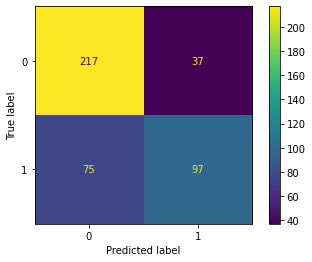

In [ ]:
# create kNN object --> fill with n_neighbors and weights
knn_titanic_c = KNeighborsClassifier(n_neighbors=20, weights='uniform')
#fit model
knn_titanic_c.fit(X_train, y_train)

#make predictions
knn_titanic_c_pred = knn_titanic_c.predict(X_train)

#estimate probability
knn_titanic_c_pred_proba = knn_titanic_c.predict_proba(X_train)

#compute accuracy/score 
print(f'Score: {knn_titanic_c.score(X_train, y_train)}')

#create and display confusion matrix
knn_titanic_c_cm = confusion_matrix(y_train, knn_titanic_c_pred)
ConfusionMatrixDisplay(knn_titanic_c_cm, display_labels=knn_titanic_c.classes_).plot();

#create classification report
print(f'Classification Report\n-----\n{pd.DataFrame(classification_report(y_train, knn_titanic_c_pred, output_dict=True))}')
knn_computes['Model C'] = fit_eval_compute(knn_titanic_c, X_train, y_train).values

### What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?


In [ ]:
knn_computes

,Model A,Model B,Model C
Accuracy/Score,0.788732,0.758216,0.737089
True Positives,116.000000,97.000000,97.000000
False Postives,34.000000,28.000000,37.000000
True Negatives,220.000000,226.000000,217.000000
False Negatives,56.000000,75.000000,75.000000
TPR/Recall,0.674419,0.563953,0.563953
False Positive Rate,0.133858,0.110236,0.145669
True Negative Rate,0.866142,0.889764,0.854331
False Negative Rate,0.325581,0.436047,0.436047
Precision,0.773333,0.776000,0.723881


### Which model performs best on our out-of-sample data from validate?

> Models 2 and 3 perform best, but no model gets more than 6% above baseline. 

In [ ]:
# create dFrame to hold validate scores
# to remember: adding scalar* value to dFrame requires brackets to make it list/like
validate_scores = pd.DataFrame({'Baseline': baseline_acc}, index=['score(accuracy)'])
for idx, model in enumerate([knn_titanic_a, knn_titanic_b, knn_titanic_c]):
    validate_scores[f'Model {idx+1}'] = [model.score(X_validate, y_validate)]

validate_scores

,Baseline,Model 1,Model 2,Model 3
score(accuracy),0.596244,0.622378,0.657343,0.657343


# Exercises - Logistic Regression

In these exercises, we'll continue working with the titanic dataset and building logistic regression models. Throughout this exercise, be sure you are training, evaluation, and comparing models on the train and validate datasets. The test dataset should only be used for your final model.

For all of the models you create, choose a threshold that optimizes for accuracy.

Do your work for these exercises in either a notebook or a python script named model within your classification-exercises repository. Add, commit, and push your work.



## Create a model that includes age in addition to fare and pclass. Does this model perform better than your baseline?

In [ ]:
# Create the logistic regression
logit = LogisticRegression(random_state=514)

# specify the features we're using
selected_feats = ['age', 'pclass', 'fare']

# Fit a model using only these specified features
logit.fit(X_train[selected_feats], y_train)

# Since we .fit on a subset, we .predict on that same subset of features
y_pred = logit.predict(X_train[selected_feats])

In [ ]:
def logit_feps (model, features, X, y, name):
    """
    """
    
    # Fit a model using only these specified features
    model.fit(X[features], y)

    # Since we .fit on a subset, we .predict on that same subset of features
    y_pred = model.predict(X[features])

    score = pd.DataFrame({'Model': name, \
    'Accuracy(Score)': model.score(X[features], y),
    'Features Used': f'{features}',
    }, index=[0])

    return score

In [ ]:
# model_a = logit_feps(logit, selected_feats, X_train, y_train, 'Model A')

In [ ]:
logit_scores = pd.DataFrame({'Model': 'Baseline', \
    'Accuracy(Score)': baseline_acc,
    'Features Used': 'Baseline Prediction',
    }, index=[0])

logit_scores

,Model,Accuracy(Score),Features Used
0,Baseline,0.596244,Baseline Prediction


In [ ]:
logit_scores = pd.concat([logit_scores, logit_feps(logit, selected_feats, X_train, y_train, 'Model A')], ignore_index=True)

In [ ]:
logit_scores

,Model,Accuracy(Score),Features Used
0,Baseline,0.596244,Baseline Prediction
1,Model A,0.713615,"['age', 'pclass', 'fare']"


## Include sex in your model as well. 
 - Note that you'll need to encode or create a dummy variable of this feature before including it in a model.



In [ ]:
# create object
model_b = LogisticRegression(random_state=514)

# select features
model_b_feat = ['age', 'pclass', 'fare', 'is_female']

In [ ]:
logit_scores = pd.concat([logit_scores, logit_feps(model_b, model_b_feat, X_train, y_train, 'Model B')],\
    ignore_index=True )

## Try out other combinations of features and models.



In [ ]:
# Model C - all Features 
model_c = LogisticRegression(random_state=514)
model_c_feat = list(X_train.columns)
c_score = logit_feps(model_c, model_c_feat, X_train, y_train, 'Model C')

# Model D - all features with class_weight="balanced"
model_d = LogisticRegression(random_state=514, class_weight='balanced')
model_d_feat = list(X_train.columns)
d_score = logit_feps(model_d, model_d_feat, X_train, y_train, 'Model D')

# Model E - only age
model_e = LogisticRegression(random_state=514) 
model_e_feat = ['age']
e_score = logit_feps(model_e, model_e_feat, X_train, y_train, 'Model E')

# Model F - is_female, pclass, C value set to .01
model_f = LogisticRegression(random_state=514, C=.01)
model_f_feat = ['is_female', 'pclass']
f_score = logit_feps(model_f, model_f_feat, X_train, y_train, 'Model F')


In [ ]:
#score_list = [c_score, d_score, e_score, f_score]
logit_scores = pd.concat([logit_scores,c_score, d_score, e_score, f_score], ignore_index=True)
logit_scores

,Model,Accuracy(Score),Features Used
0,Baseline,0.596244,Baseline Prediction
1,Model A,0.713615,"['age', 'pclass', 'fare']"
2,Model B,0.807512,"['age', 'pclass', 'fare', 'is_female']"
3,Model C,0.805164,"['pclass', 'age', 'sibsp', 'parch', 'fare', 'alone', 'is_female', 'embark_Cherbourg', ..."
4,Model D,0.812207,"['pclass', 'age', 'sibsp', 'parch', 'fare', 'alone', 'is_female', 'embark_Cherbourg', ..."
5,Model E,0.596244,['age']
6,Model F,0.708920,"['is_female', 'pclass']"


### Use your best 3 models to **predict** and **evaluate** on your validate sample.
> Models: B, C, D


In [ ]:
model_b_pred = model_b.predict(X_validate[model_b_feat])
print(classification_report(y_validate, model_b_pred))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81        85
           1       0.74      0.64      0.69        58

    accuracy                           0.76       143
   macro avg       0.76      0.74      0.75       143
weighted avg       0.76      0.76      0.76       143



In [ ]:
model_c_pred = model_c.predict(X_validate[model_c_feat])
print(classification_report(y_validate, model_c_pred))

              precision    recall  f1-score   support

           0       0.77      0.85      0.80        85
           1       0.73      0.62      0.67        58

    accuracy                           0.76       143
   macro avg       0.75      0.73      0.74       143
weighted avg       0.75      0.76      0.75       143



In [ ]:
model_d_pred = model_d.predict(X_validate[model_d_feat])
print(classification_report(y_validate, model_d_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79        85
           1       0.69      0.71      0.70        58

    accuracy                           0.76       143
   macro avg       0.75      0.75      0.75       143
weighted avg       0.76      0.76      0.76       143



In [ ]:
#validate_scores = pd.DataFrame(columns=['Model','Kind', 'Accuracy(Score)'])

### Choose your best model from the validation performation, and evaluate it on the test dataset. How do the performance metrics compare to validate? to train?

In [ ]:
def compute (model, X_df, y_df):
    """
    Takes in a model, the big X, and little y and computes performance statistics. 
    
    Returns: A Series with featuring the statistics
    """

    # Make Predictions
    y_pred = model.predict(X_df)

    confusion = confusion_matrix(y_df, y_pred)

    #assign results of confusion matrix to variables
    true_negative = confusion[0,0]
    false_positive = confusion[0,1]
    false_negative = confusion[1,0]
    true_positive = confusion[1,1]

    #accuracy
    accuracy = (true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative)
    #print(f'Accuracy: {accuracy}')

    #true positive rate / recall
    recall = true_positive / (true_positive +false_negative)
    #print(f'True Positive Rate/Recall: {recall} ')

    #false positive rate
    false_positive_rate = false_positive / (true_negative + false_positive)
    #print(f'False Positive Rate: {false_positive_rate} ')

    #true negative rate
    true_negative_rate = true_negative / (true_negative + false_positive)
    #print(f'True Negative Rate: {true_negative_rate}')

    #false negative rate
    false_negative_rate = false_negative / (false_negative + true_positive)
    #print(f'False Negative Rate: {false_negative_rate}')

    #precision
    precision = true_positive / (true_positive + false_positive)
    #print(f'Precision: {precision}')

    #f1-score
    f1_score = 2 * (precision * recall) / (precision + recall)
    #print(f'F1-Score: {f1_score}')

    #support
    support_positive = true_positive + false_negative
    support_negative = false_positive + true_negative
    #print(f'Support Positive: {support_positive} \nSupport Negative: {support_negative}')

    computes = pd.Series([accuracy, true_positive, false_positive, true_negative, false_negative,\
                        recall, false_positive_rate, true_negative_rate, false_negative_rate, \
                        precision, f1_score, support_positive, support_negative])
                        
    return computes

In [ ]:
performance_comparisons = pd.DataFrame(columns=[], index=statistics)

In [ ]:
performance_comparisons['Train'] = compute(model_c, X_train, y_train).values
performance_comparisons['Validate'] = compute(model_c, X_validate, y_validate).values
performance_comparisons['Test'] = compute(model_c, X_test, y_test).values

In [ ]:
performance_comparisons

,Train,Validate,Test
Accuracy/Score,0.805164,0.755245,0.804196
True Positives,122.000000,36.000000,43.000000
False Postives,33.000000,13.000000,13.000000
True Negatives,221.000000,72.000000,72.000000
False Negatives,50.000000,22.000000,15.000000
TPR/Recall,0.709302,0.620690,0.741379
False Positive Rate,0.129921,0.152941,0.152941
True Negative Rate,0.870079,0.847059,0.847059
False Negative Rate,0.290698,0.379310,0.258621
Precision,0.787097,0.734694,0.767857


## Bonus 1: How do different strategies for handling the missing values in the age column affect model performance?



## Bonus 2: How do different strategies for encoding sex affect model performance?



## Bonus 3: scikit-learn's LogisticRegression classifier is actually applying a regularization penalty to the coefficients by default. This penalty causes the magnitude of the coefficients in the resulting model to be smaller than they otherwise would be. This value can be modified with the C hyper parameter. Small values of C correspond to a larger penalty, and large values of C correspond to a smaller penalty.



## Try out the following values for C and note how the coefficients and the model's performance on both the dataset it was trained on and on the validate split are affected. C = [.01, .1 , 1, 10, 100, 1000}



## Bonus Bonus: how does scaling the data interact with your choice of C?